## Discovery and Learning with Big Data/Machine Learning
## Sri Charan Bodduna
## Machine Learning Supervised Logistic Regression


### Import Libraries

In [1]:
# Import Python Libraries: NumPy and Pandas

import pandas as pd
import numpy as np

In [2]:
# Import Libraries & modules for data visualization

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [4]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

In [5]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
# Import scikit-Learn module classification report to later use for information about how the system 
#try to classify/lable each record

from sklearn.metrics import classification_report

### Load Data

In [8]:
# Specify location of the dataset

filename = '/Users/sricharanbodduna/Downloads/Iris (3).csv'

# Load the data into a Pandas DataFrame

df = pd.read_csv(filename)


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocess the Dataset
#### Clean the data: Find and Mark Missing Values

In [11]:
# mark zero values as missing or NaN

df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)

# count the number of NaN values in each column

print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Performing the Exploratory Data Analysis (EDA)

In [12]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns

print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (150, 6)


In [13]:
#get the data types of all the variables / attributes in the data set

print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [14]:
#return the summary statistics of the numeric variables/attributes in the data set

print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [15]:
#class distribution i.e. how many records are in each class

print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Creating a Histogram

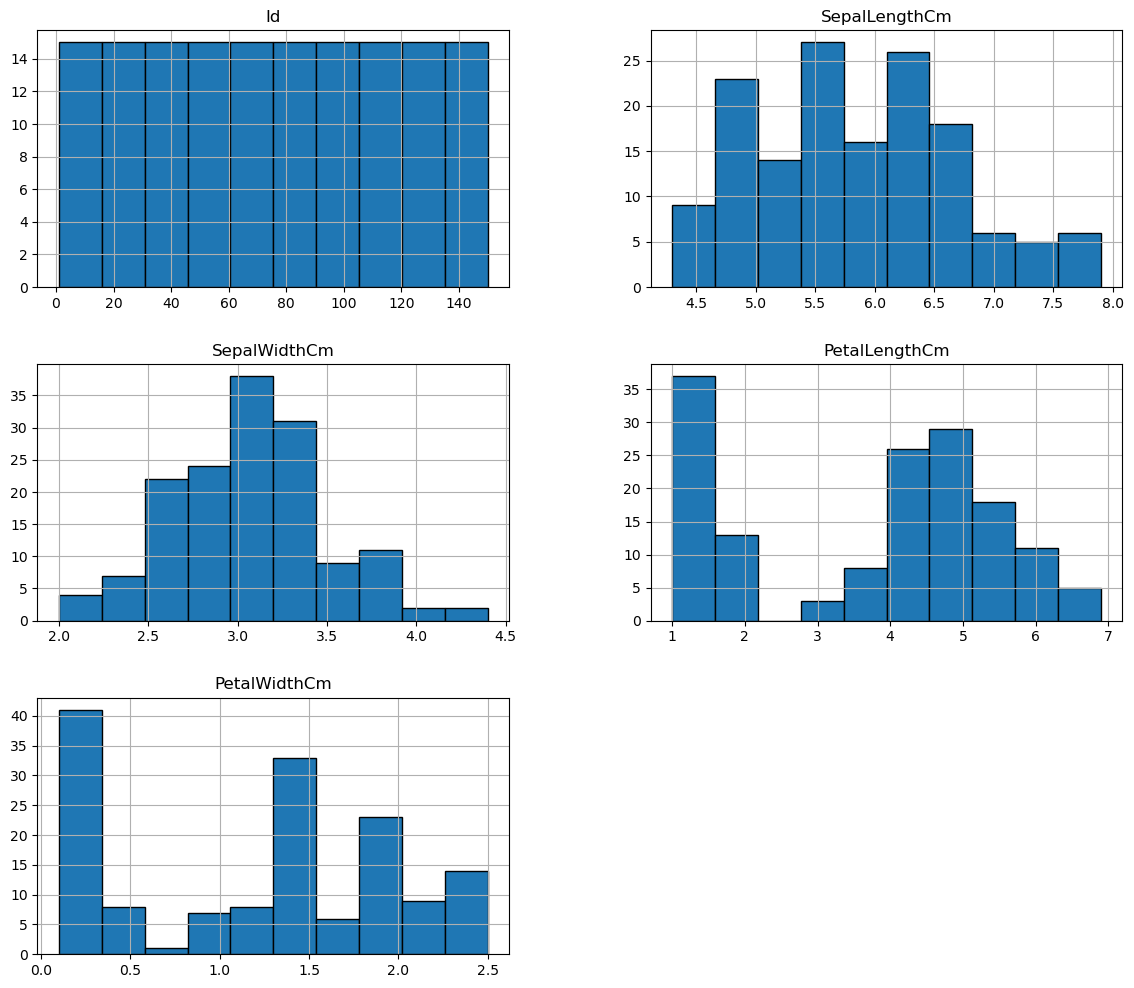

In [16]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.

df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

### Creating a Box Plot

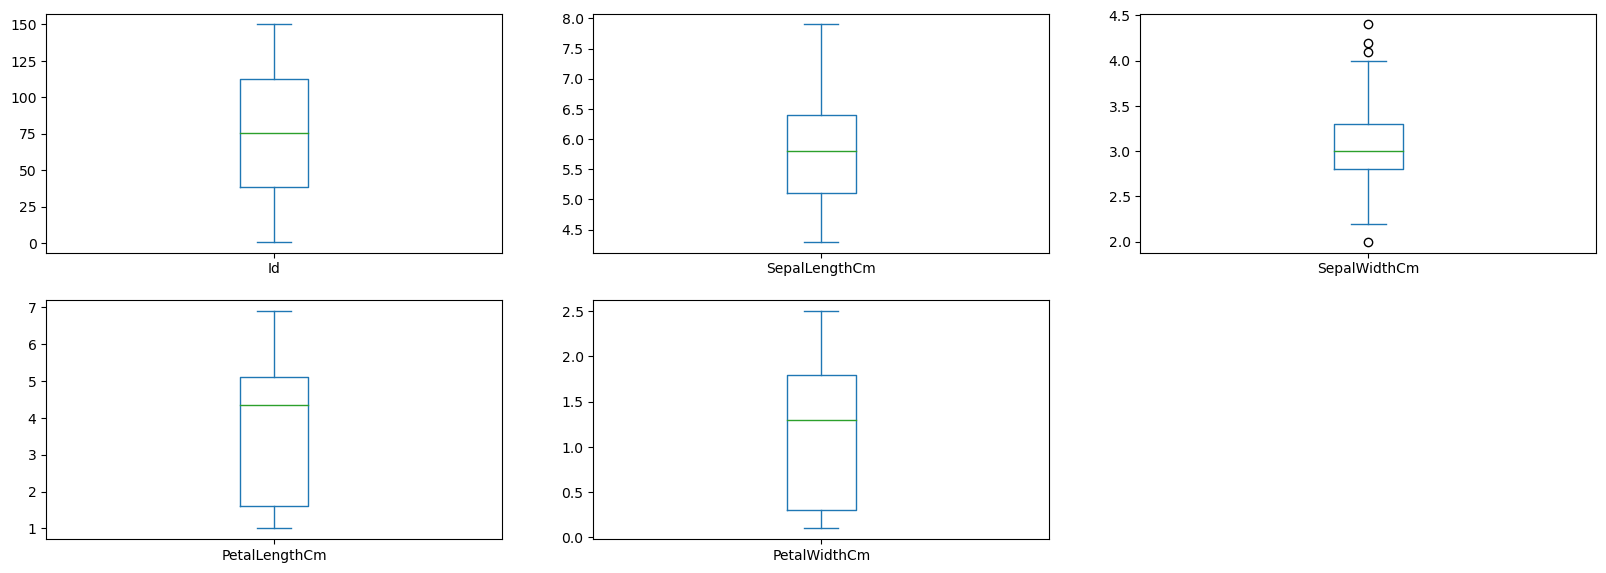

In [19]:
# Boxplots

df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

### Create a Pair Plot 

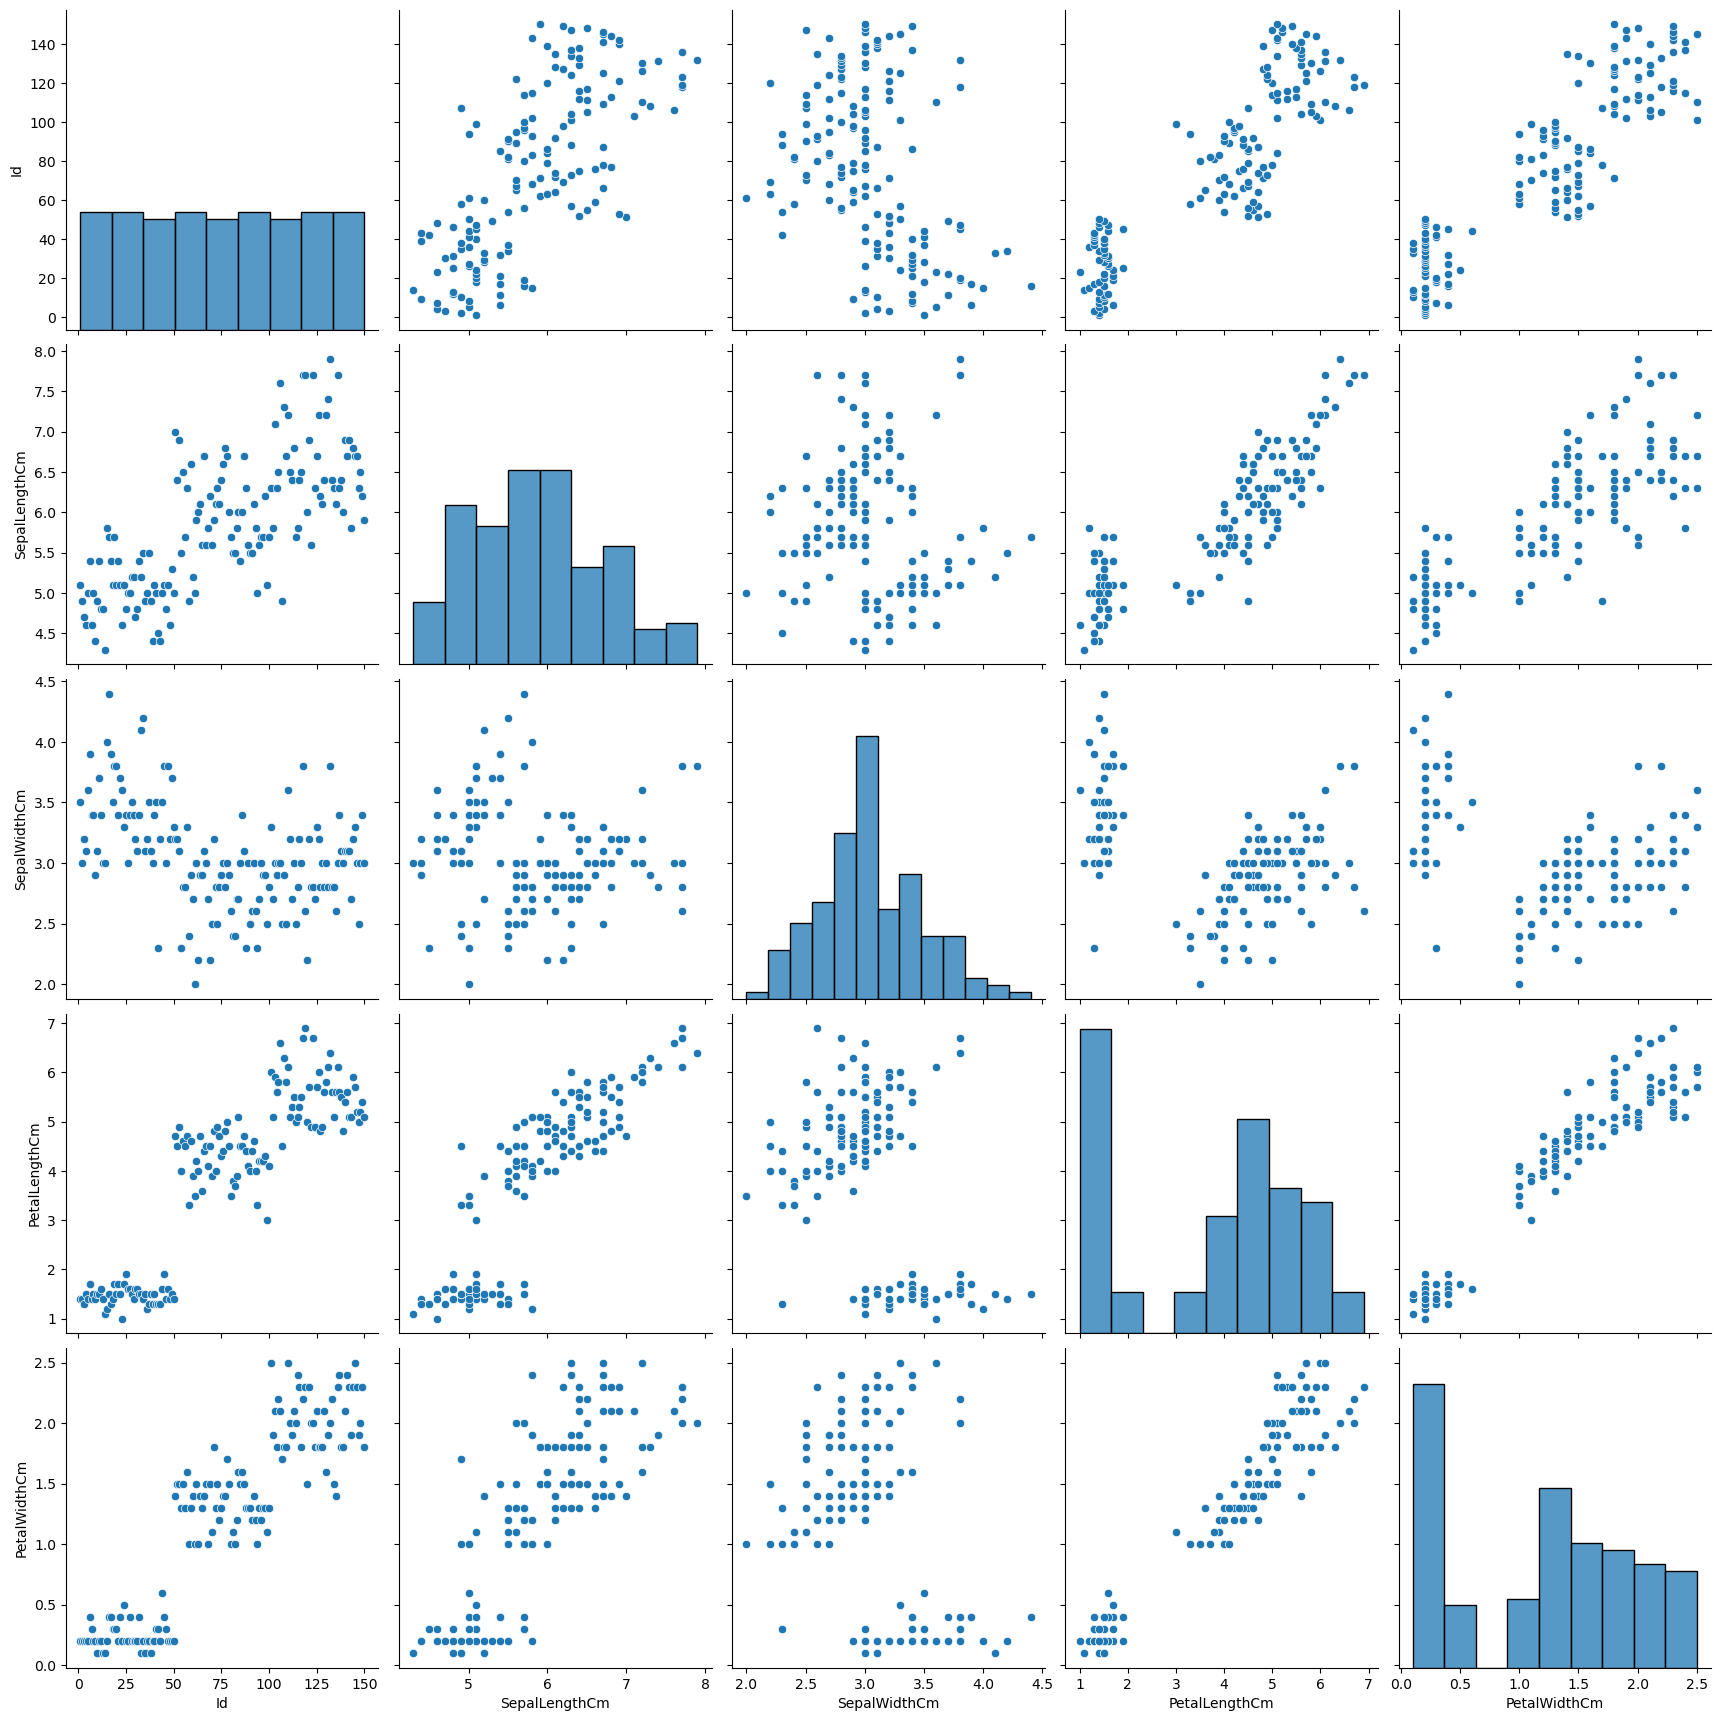

In [20]:
# Please click on the above URL to learn more about Pair Plots
# I know this is a lot of information but I wanted you to see what is possible with Seaborn library.

sns.pairplot(df, height=3.5);
plt.show()

### Creating a Pair Plot with Color


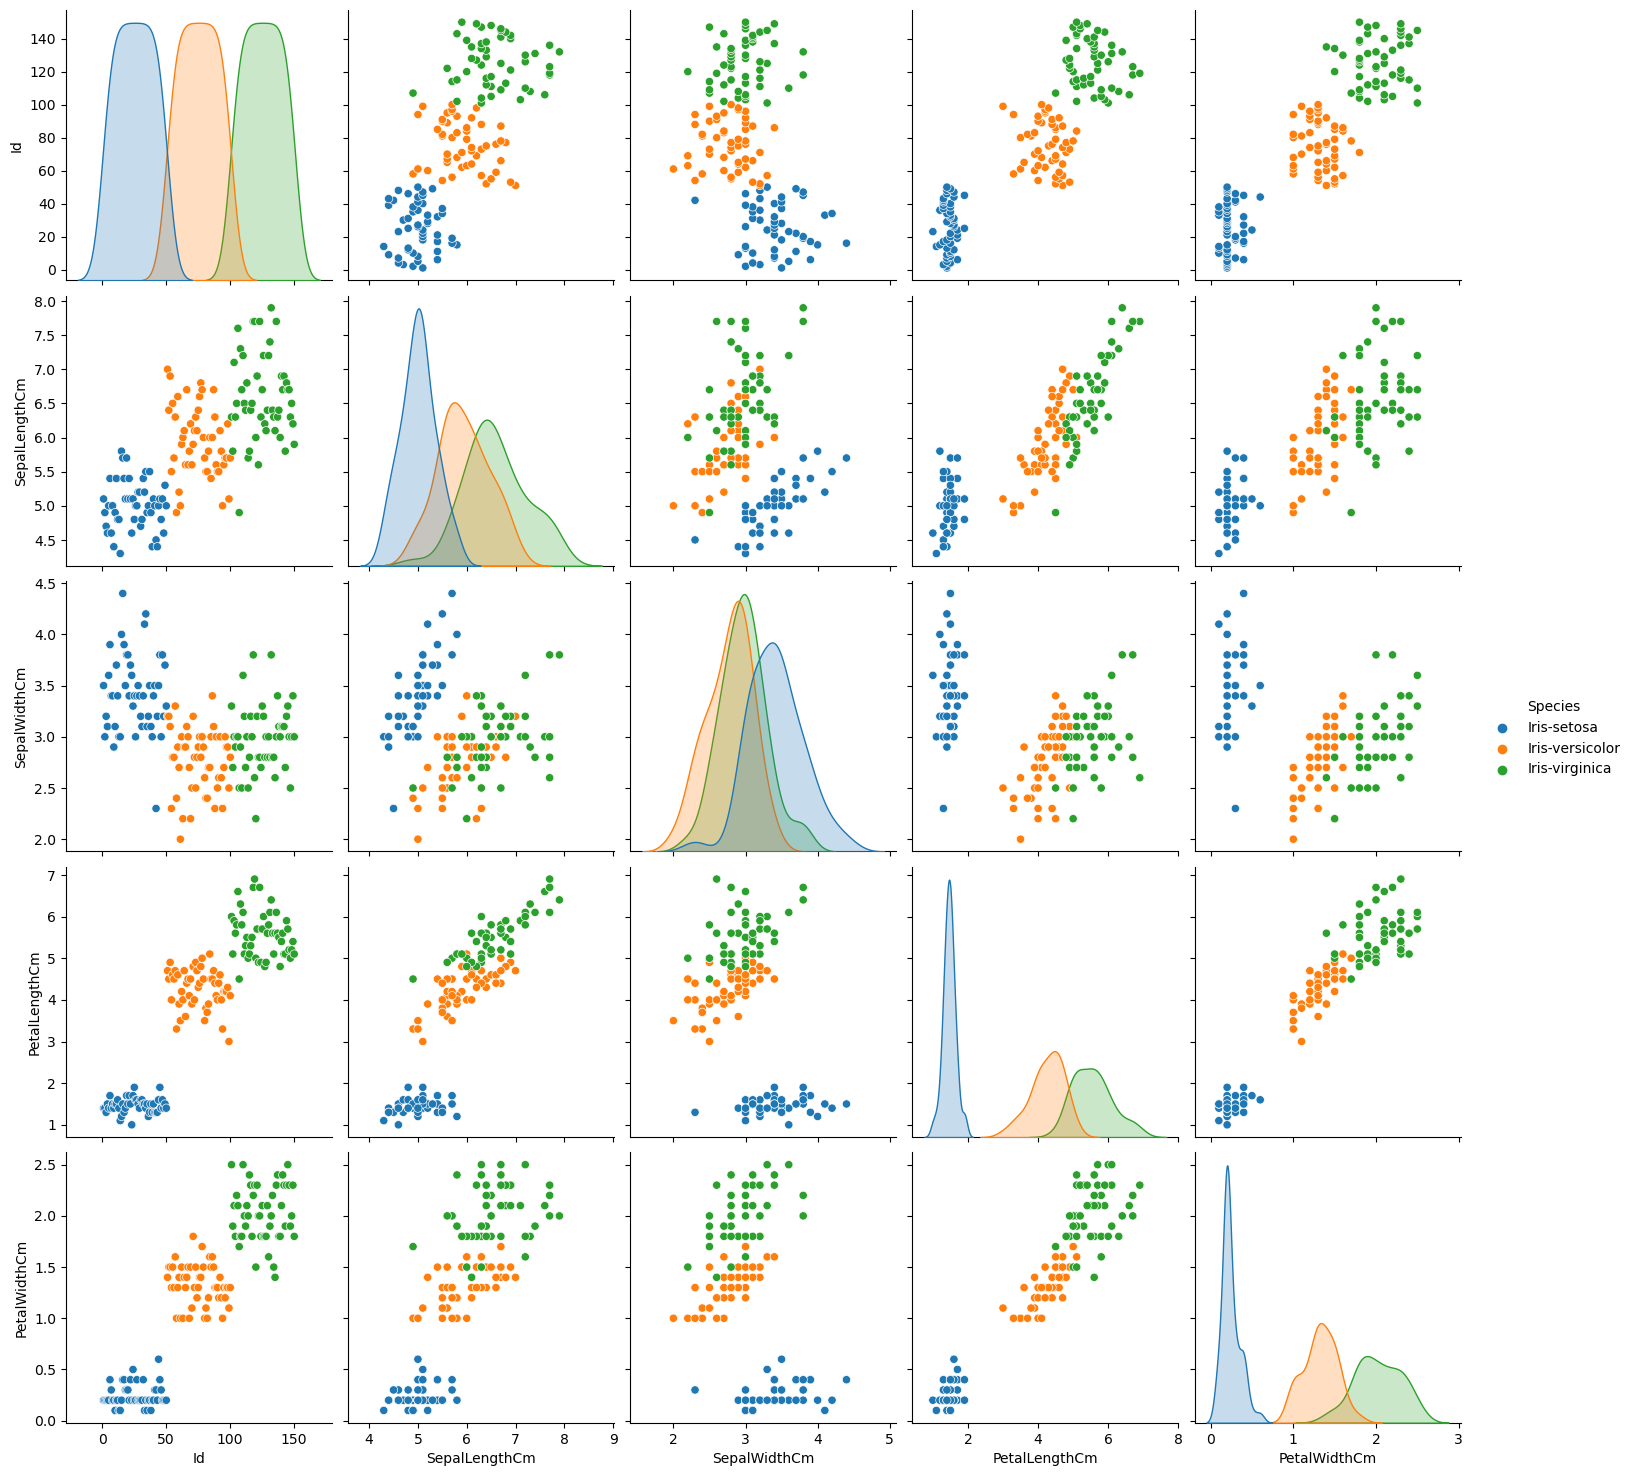

In [21]:
# Let's try that again using color.  Notice: assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered k#ernel density estimate (KDE)

sns.pairplot(df, hue='Species', height=3, aspect= 1);

### Creating a Violin Plot

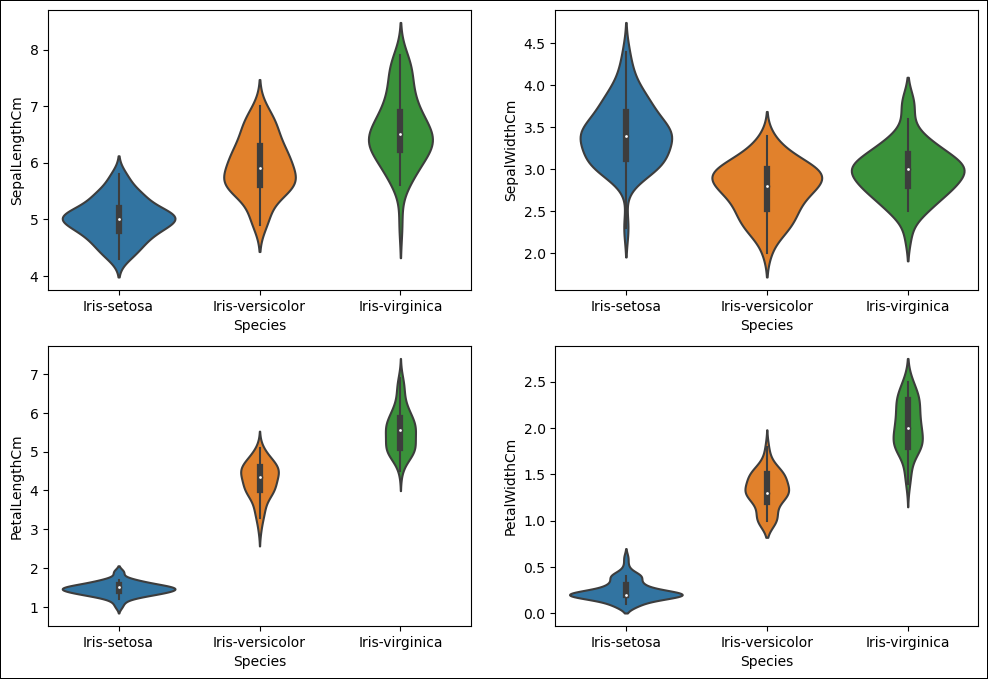

In [22]:
#  Please click on the URL above to learn more about Violin Plots

plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df);

### Separate the Dataset into Input & Output NumPy Arrays

In [23]:
# store dataframe values into a numpy array

array = df.values

# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 
# these are the independent variables or predictors

X = array[:,1:5]

# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict

Y = array[:,5]

### Spilt into Input/Output Array into Training/Testing Datasets

In [24]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%

test_size = 0.33

#selection of records to include in each data sub-dataset must be done randomly

seed = 7

#split the dataset (input and output) into training / test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

### Build and Train the Model

In [25]:
#build the model

model = LogisticRegression(random_state=seed, max_iter=1000)

# train the model using the training sub-dataset

model.fit(X_train, Y_train)

#print the classification report

predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n",report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



### Score the Accuracy of the Model

In [26]:
#score the accuracy level

result = model.score(X_test, Y_test)

#print out the results

print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


### Classify/Prediction

In [27]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [28]:
model.predict([[5, 3.6, 1.4, 1.5]])

array(['Iris-setosa'], dtype=object)

### Evaluate the Model using the 10-fold Cross-Validation Technique.

In [29]:
# Evaluate the algorithm and specify the number of times of repeated splitting, in this case 10 folds

n_splits=10

#Fix the random seed.  You must use the same seed value so that the same subsets can be obtained for each time the process is repeated

seed=7

kfold=KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model 

scoring="accuracy"

#train the model and run K-fold cross validation to validate / evaluate the model

results=cross_val_score (model, X, Y, cv=kfold, scoring=scoring)

# print the evaluation results.  The result is the average of all the results obtained from the K-fold cross validation

print("Accuracy: %.3f (%.3f)"% (results.mean(), results.std()))

Accuracy: 0.967 (0.054)
